In [9]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [10]:
# construct random generator 
rng = np.random.default_rng(12345)

### Standard Brownian Motion

We generate Brownian increments using the formula:

$$\Delta W_n = \sqrt{\Delta t} \xi_n$$

Where:
- $\Delta W_n$ represents the Brownian increment at time step $n$.
- $\xi_n$ are independent and identically distributed (i.i.d.) random variables drawn from the standard normal distribution.
- $\Delta t$ denotes the time step.

To construct an incremental path of Brownian motion, we use the formula:

$$W_{n+1} = W_n + \Delta W_n$$

Where $W_n$ represents the value of the Brownian motion at time step $n$.

The Brownian increments $\Delta W_n$ are i.i.d. random variables drawn from $N(0, \Delta t)$, indicating a normal distribution with mean $0$ and variance $\Delta t$.

#### Mean and Variance

The mean of the Brownian motion is $0$, which can be derived as follows:

$$E[\Delta W_n] = \sqrt{\Delta t} \cdot E[\xi_n] = 0$$

Since $\xi_n$ are drawn from the standard normal distribution, their mean is $0$.

The variance of the Brownian motion is $\Delta t$, derived as:

$$Var(\Delta W_n) = E[(\Delta W_n - E[\Delta W_n])^2] = E[\Delta W_n^2] = \Delta t$$

Where we have used the fact that the variance of $\xi_n$ is $1$.

Therefore, the Brownian motion has mean $0$ and variance $\Delta t$.


In [11]:
def BrownianMotion(W0, T, Nsteps, Npaths):
    t, dt = np.linspace(0, T, Nsteps+1, retstep=True)
    W = np.zeros((Nsteps+1, Npaths))
    W[0, :] = W0
    
    for n in range(Nsteps):
        dW = np.sqrt(dt) * rng.normal(0, 1, Npaths)
        W[n+1, :] = W[n, :] + dW[:]
        
    return t, W

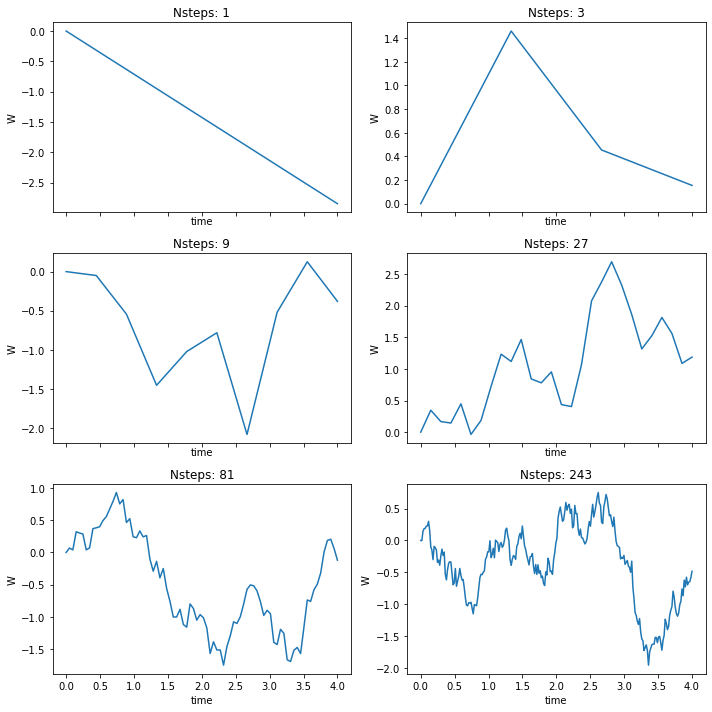

In [12]:
Nplots = 6

W0 = 0 
T = 4 # Time
Nsteps = [3**i for i in range(Nplots)] # number of steps
Npaths = 1 #number of paths

fig, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=True)

for i in range(Nplots):
    row = i // 2 
    col = i % 2 
    t, W = BrownianMotion(W0, T, Nsteps[i], Npaths)
    axes[row, col].plot(t, W)
    axes[row, col].set_title(f"Nsteps: {Nsteps[i]}")
    axes[row, col].set_xlabel('time')
    axes[row, col].set_ylabel('W')

plt.tight_layout()
plt.show()

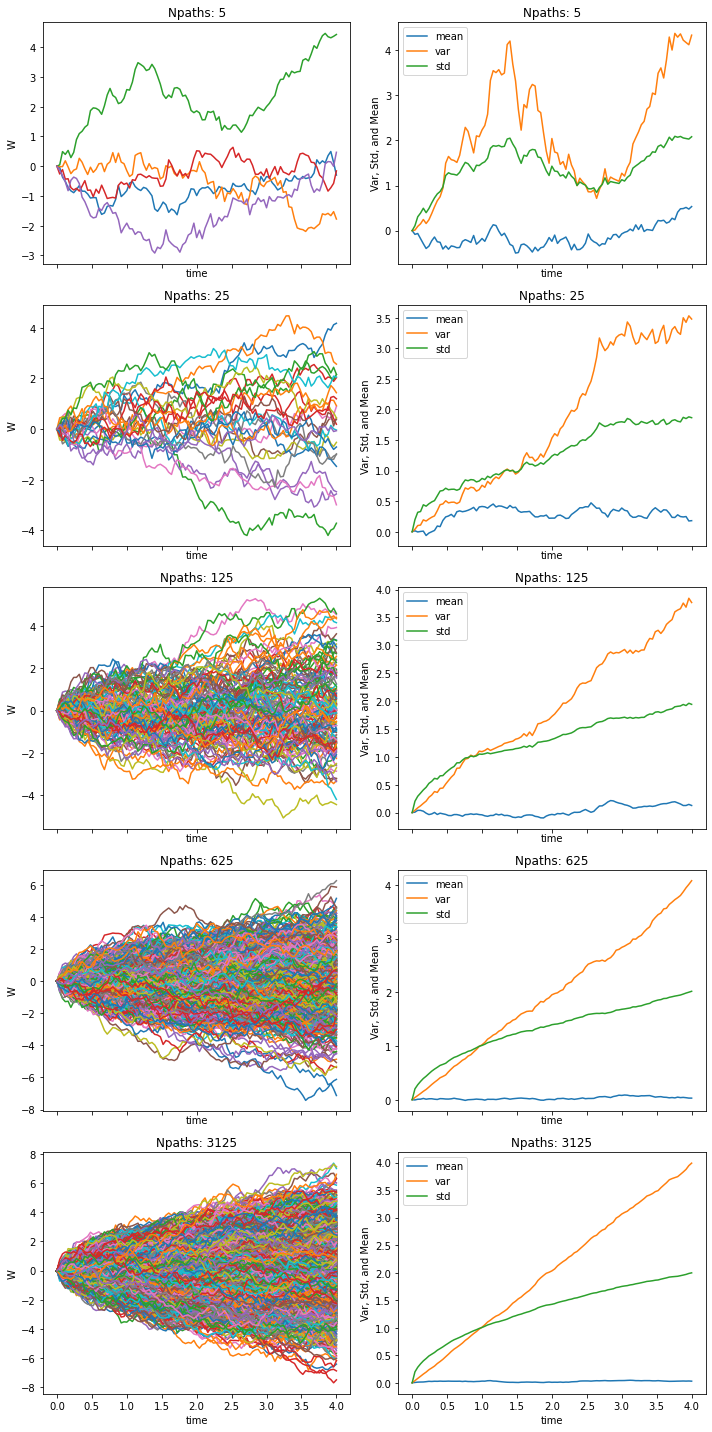

In [13]:
W0 = 0 
T = 4 # Time
Nsteps = 100 # number of steps
Npaths = [5**i for i in range(1, Nplots)]

fig, axes = plt.subplots(5, 2, figsize=(10, 20), sharex=True)

for i in range(Nplots-1):

    t, W = BrownianMotion(W0, T, Nsteps, Npaths[i])
    
    axes[i, 0].plot(t, W)
    axes[i, 0].set_title(f"Npaths: {Npaths[i]}")
    axes[i, 0].set_xlabel("time")
    axes[i, 0].set_ylabel('W')
    
    # mean, var, and std plot
    mean_plot = np.mean(W, axis=1)
    var_plot = np.var(W, axis=1)
    std_plot = np.std(W, axis=1)
    axes[i, 1].plot(t, mean_plot, label='mean')
    axes[i, 1].plot(t, var_plot, label='var')
    axes[i, 1].plot(t, std_plot, label='std')
    axes[i, 1].set_title(f"Npaths: {Npaths[i]}")
    axes[i, 1].set_xlabel('time')
    axes[i, 1].set_ylabel('Var, Std, and Mean')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

### Geometric Brownian Motion

Geometric Bownian Motion(GBM) is a continuous-time stochastic process that models various phenomena. The key difference between GBM and standard Brownian motion is that GBM incoporates drift(a directional trend) and multiplicative noise, making it more suitable for modeling positive-valued processes like prices that cannot go negative.

The incremental formula for GBM is given by:
$$ S_{n+1} = S_n \exp( (\mu - \frac{1}{2} \sigma^2) \Delta t + \sigma \Delta W_n) $$

where:
- $S_n$ represents the value of the Geometric Brownian Motion at time step $n$.
- $\mu$ is the drift coefficient, representing the expected return or growth rate.
- $\sigma$ is the volatility coefficient, representing the standard deviation of returns.
- $\Delta W_n$ is the Brownian increment, as defined previously.
- $\Delta t$ is the time step.
- $\exp(\cdot)$ denotes the exponential function.

#### Mean and Variance of GBM
The mean ($E[S_t]$) and variance ($Var(S_t)$) of Geometric Brownian Motion at time $t$ are not as straightforward as in the standard Brownian motion due to the exponential component and depend on the initial value $S_0$:
$$ E[S_t] = S_0 \exp(\mu t)$$

This formula shows that the mean of GBM grows exponentially over time, at a rate determined by the drift $\mu$.

The variance of GBM is given by:
$$ Var(S_t) = S_0 ^2 \exp(2\mu t) (\exp(\sigma^2 t) -1) $$

This indicates that the variance of GBM also grows exponentially over time, influenced by both the drift $\mu$ and the volatility $\sigma$.

#### Euler(-Maruyama) Method
The Euler-Maruyama method is a numerical approximation technique used to simulate paths of stochastic differential equations (SDEs), including GBM. It is a discrete approximation, making it practical for simulations on computers.The Euler approximation of GBM is particularly useful because exact solutions to SDEs are often difficult or impossible to obtain for more complex models.

The Euler approximation for GBM can be expressed as follows for simulating the stock price $S_{n+1}$ from $S_n$ over a small time interval $\Delta t$:

\begin{align}
S_{n+1} & = S_n + \mu S_n \Delta t + \sigma S_n \Delta W_n \\
        & = S_n (1+ \mu \Delta t + \sigma \Delta W_n)
\end{align}


Here:
- $\mu$ is the drift coefficient, as before.
- $\sigma$ is the volatility coefficient, as before.
- $\Delta W_n$ is the increment of the Brownian motion, which can be simulated as $\sqrt{\Delta t} \xi_n$, where $\xi_n$ is a standard normal random variable.

The key differences that the original GBM formulation uses an exponential function to represent continuous growth over time, perfect for theoretical models and analyses. However, the Euler approximation breaks down the continuous path into discrete steps, making it suitable for numerical simulations.

In [14]:
def GBM(S0, T, mu, sigma, Nsteps, Npaths):
    t, dt = np.linspace(0, T, Nsteps+1, retstep=True)
    S = np.zeros((Nsteps+1, Npaths))
    S[0, :] = S0
    
    for n in range(Nsteps):
        dW = np.sqrt(dt) * rng.normal(0, 1, Npaths)
        S[n+1, :] = S[n, :] * (1 + mu * dt + sigma * dW[:])
        
    return t, S

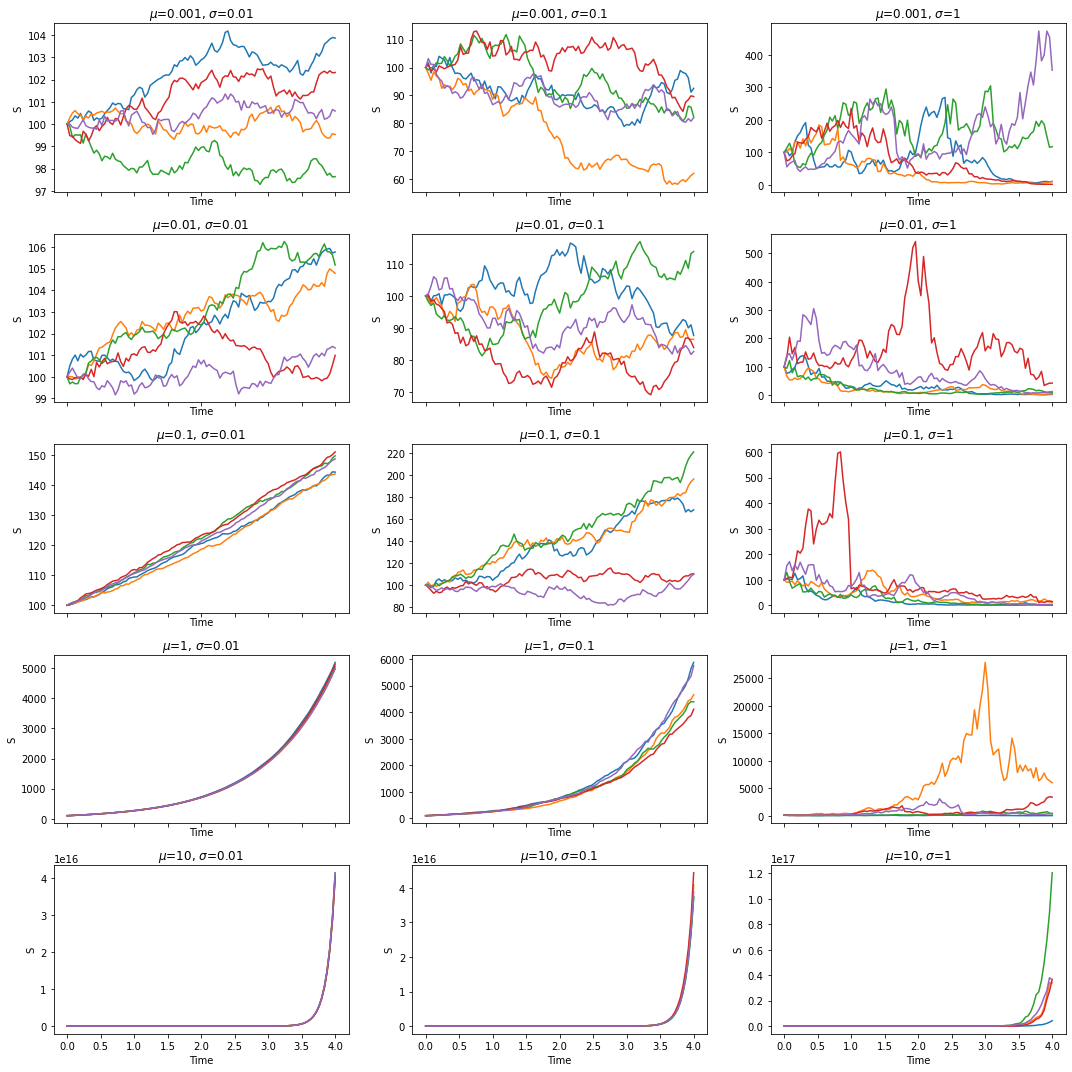

In [15]:
S0 = 100
T = 4
mu = [0.001, 0.01, 0.1, 1, 10]
sigma = [0.01, 0.1, 1]
Nsteps = 100
Npaths = 5

fig, axes = plt.subplots(5, 3, figsize=(15, 15), sharex=True)

for i, mu_val in enumerate(mu):
    for j, sigma_val in enumerate(sigma):
        t, S = GBM(S0, T, mu_val, sigma_val, Nsteps, Npaths)
        ax = axes[i, j]
        ax.plot(t, S)
        ax.set_title(f"$\mu$={mu_val}, $\sigma$={sigma_val}")
        ax.set_xlabel('Time')
        ax.set_ylabel('S')

plt.tight_layout()
plt.show()

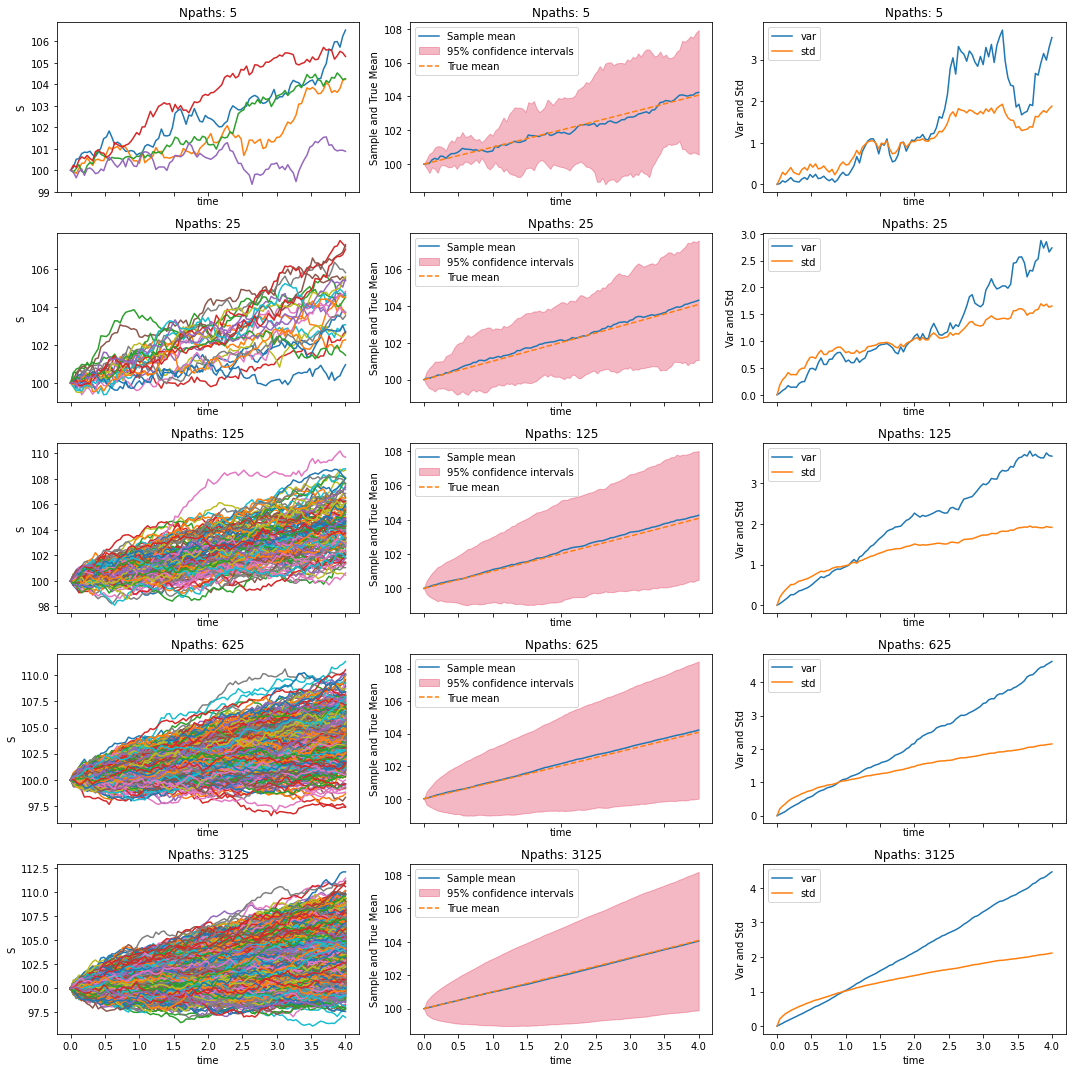

In [19]:
S0 = 100 
T = 4
Nsteps = 100
Npaths = [5**i for i in range(1, Nplots)]
mu = 0.01
sigma = 0.01

fig, axes = plt.subplots(5, 3, figsize=(15, 15), sharex=True)

for i in range(Nplots-1):

    t, S = GBM(S0, T, mu, sigma, Nsteps, Npaths[i])
    
    mean_plot = np.mean(S, axis=1)
    var_plot = np.var(S, axis=1)
    std_plot = np.std(S, axis=1)
    
    axes[i, 0].plot(t, S)
    axes[i, 0].set_title(f"Npaths: {Npaths[i]}")
    axes[i, 0].set_xlabel("time")
    axes[i, 0].set_ylabel('S')
    
    axes[i, 1].plot(t, mean_plot, label='Sample mean')
    axes[i, 1].fill_between(t, 
                            mean_plot - 1.96*std_plot, 
                            mean_plot + 1.96*std_plot, 
                            alpha=0.3, color='crimson', 
                            label='95% confidence intervals')
    axes[i, 1].plot(t, S0 * np.exp(mu * t), linestyle='--', label='True mean')
    axes[i, 1].set_title(f"Npaths: {Npaths[i]}")
    axes[i, 1].set_xlabel('time')
    axes[i, 1].set_ylabel('Sample and True Mean')
    axes[i, 1].legend(loc='upper left')

    axes[i, 2].plot(t, var_plot, label='var')
    axes[i, 2].plot(t, std_plot, label='std')
    axes[i, 2].set_title(f"Npaths: {Npaths[i]}")
    axes[i, 2].set_xlabel('time')
    axes[i, 2].set_ylabel('Var and Std')
    axes[i, 2].legend()

plt.tight_layout()
plt.show()

### Accuracy

Let start with the exact solution formula of GBM:
$$ S_{n+\Delta t} = S_t \exp( (\mu - \frac{1}{2} \sigma^2) \Delta t + \sigma \xi \sqrt{\Delta t}) $$


The Taylor series expansion of $e^x$ around $x=0$ is given by:
$$ e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots$$ 

Applying this expansion to the exponent in the exact GBM formula, we consider:
$$ x = (\mu-\frac{1}{2}\sigma ^2 ) \Delta t + \sigma \xi \sqrt{\Delta t}$$

Then the expansion up to the second order term is:
$$ \exp(x) \approx 1 + x + \frac{x^2}{2!}$$

Substituting $x$ back into the equation:
\begin{align}
\exp((\mu-\frac{1}{2}\sigma ^2 ) \Delta t + \sigma \xi \sqrt{\Delta t}) & \approx 1 + (\mu-\frac{1}{2}\sigma ^2 ) \Delta t + \sigma \xi \sqrt{\Delta t} \\
& + \frac{1}{2}((\mu-\frac{1}{2}\sigma ^2 ) \Delta t + \sigma \xi \sqrt{\Delta t})^2
\end{align}

We focus on the primary terms up to the order of $\Delta t$:
\begin{align}
\frac{S_{t+\Delta t}}{S_t} & = 1 + (\mu-\frac{1}{2}\sigma ^2 ) \Delta t + \sigma \xi \sqrt{\Delta t} + \frac{1}{2}((\mu-\frac{1}{2}\sigma ^2 ) \Delta t + \sigma \xi \sqrt{\Delta t})^2 \\
& = 1 + (\mu-\frac{1}{2}\sigma ^2 ) \Delta t + \sigma \xi \sqrt{\Delta t} + \frac{1}{2}((\mu-\frac{1}{2}\sigma ^2 )^2 \Delta t^2 + 2(\mu-\frac{1}{2} \sigma ^2) \sigma \xi \Delta t ^{\frac{3}{2}} + (\sigma \xi \sqrt{\Delta t})^2 ) \\
& = 1 + (\mu-\frac{1}{2}\sigma ^2 ) \Delta t + \sigma \xi \sqrt{\Delta t} + \frac{1}{2}(\sigma \xi \sqrt{\Delta t})^2) + \mathcal{O}(\Delta t^{\frac{3}{2}})
\end{align}

Hence:
\begin{align}
S_{t+\Delta t} &= S_t(1 + (\mu-\frac{1}{2}\sigma ^2 ) \Delta t + \sigma \xi \sqrt{\Delta t} + \frac{1}{2}(\sigma \xi \sqrt{\Delta t})^2) + \mathcal{O}(\Delta t^{\frac{3}{2}})) \\
&= S_t(1 + \sigma \xi \sqrt{\Delta t} + (\mu + \frac{1}{2}\sigma(\xi^2 -1))\Delta t + \mathcal{O}(\Delta t^{\frac{3}{2}}))
\end{align}


Ordering this in increasing powers of $\Delta t$ and comparing with the Euler methods:

\begin{align}
S_{t + \Delta t} & = S_t(1 + \sigma \xi \sqrt{\Delta t} + (\mu + \frac{1}{2}\sigma(\xi^2 -1))\Delta t + \mathcal{O}(\Delta t^{\frac{3}{2}})) \\
S_{n+1} &= S_n( 1 + \sigma \xi \sqrt{\Delta t} + \mu \Delta t)
\end{align}

Thus the Euler methods is accurate only up to $\mathcal{O}(\sqrt{\Delta t})$ terms.